In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Preprocessing of Data

In [2]:
data = pd.read_csv('Fraud.csv')

In [3]:
data.shape

(6362620, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

### Mapping all types of transactions to a number using dictionary as it will help in training the model in a better and simple manner

In [7]:
mapping = {
    'PAYMENT' : 0 , 
    'TRANSFER' : 1, 
    'CASH_OUT' : 2,
    'DEBIT' : 3,
    'CASH_IN' : 4 
}

data['type'] = data['type'].apply(lambda x : mapping[x])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 534.0+ MB


### Fraud transactions can be associated with one merchant/customer . But , if fewer merchants/custommers do a bit of fraud transactions here or there , they will have cracked the model and reduce the probabillity of detecting it as fraud . Considering the transaction paramenters and old and new balance of sender and reciever along with transnaction amount for the Fraud Transaction Detection . Hence , dropping the columns 'nameOrig' and 'nameDest' . (Will include ahead if required)

In [9]:
print(data.nameOrig.unique().shape , data.nameDest.unique().shape)

(6353307,) (2722362,)


### Step is just the time slot of the transaction . Fraud Transactions are independent of the time of the month .

In [10]:
data = data.drop(['nameOrig' , 'nameDest' , 'step'] , axis = 1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


### Saving and loading the preprocessed data

In [13]:
data.to_csv("preprocessed.csv")
data = pd.read_csv("preprocessed.csv")

# PCA
### As the data involves classification of a transaction into isFraud or not , we reduce the dimensionality to 2 using PCA and observer if clustering would be useful . As one type of transactions will tend to be fraud rather than others .

In [14]:
data_fraud = data[data['isFraud'] == 1]
data_normal = data[data['isFraud'] == 0]

In [18]:
def do_PCA(dataframe1 , dataframe2 , data_type1 , data_type2 , color1 , color2):
    scaled_data1 = preprocessing.scale(dataframe1)
    scaled_data2 = preprocessing.scale(dataframe2)
    plt.figure(figsize=[10,10])
    pca1 = PCA()
    pca2 = PCA()
    pca1.fit(scaled_data1)
    pca2.fit(scaled_data2)
    pca_data1 = pca1.transform(scaled_data1)
    pca_data2 = pca2.transform(scaled_data2)

    per_var1 = np.round(pca1.explained_variance_ratio_*100 , decimals=1)
    per_var2 = np.round(pca2.explained_variance_ratio_*100 , decimals=1)
    labels = ['PC' + str(i) for i in range(1 , len(per_var1)+1)]

    plt.subplot(2,2,1)
    plt.bar(x=range(1,len(per_var2)+1), height=per_var1, tick_label=labels , color = color2 , width=0.5)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title(f'Scree Plot {data_type2}')

    plt.subplot(2,2,2)
    plt.bar(x=range(1,len(per_var1)+1), height=per_var1, tick_label=labels , color = color1 , width=0.5)
    
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title(f'Scree Plot {data_type1}')
    
    pca_df1 = pd.DataFrame(pca_data1  , columns = labels)
    pca_df2 = pd.DataFrame(pca_data2  , columns = labels)
    plt.subplot(2,2,(3,4))
    plt.scatter(pca_df2.PC1, pca_df2.PC2 , color = color2 , alpha = 0.1)
    plt.scatter(pca_df1.PC1, pca_df1.PC2 , color = color1 , marker = 'x')
    
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f'scatter plot')

c:\Users\Tejas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:246: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


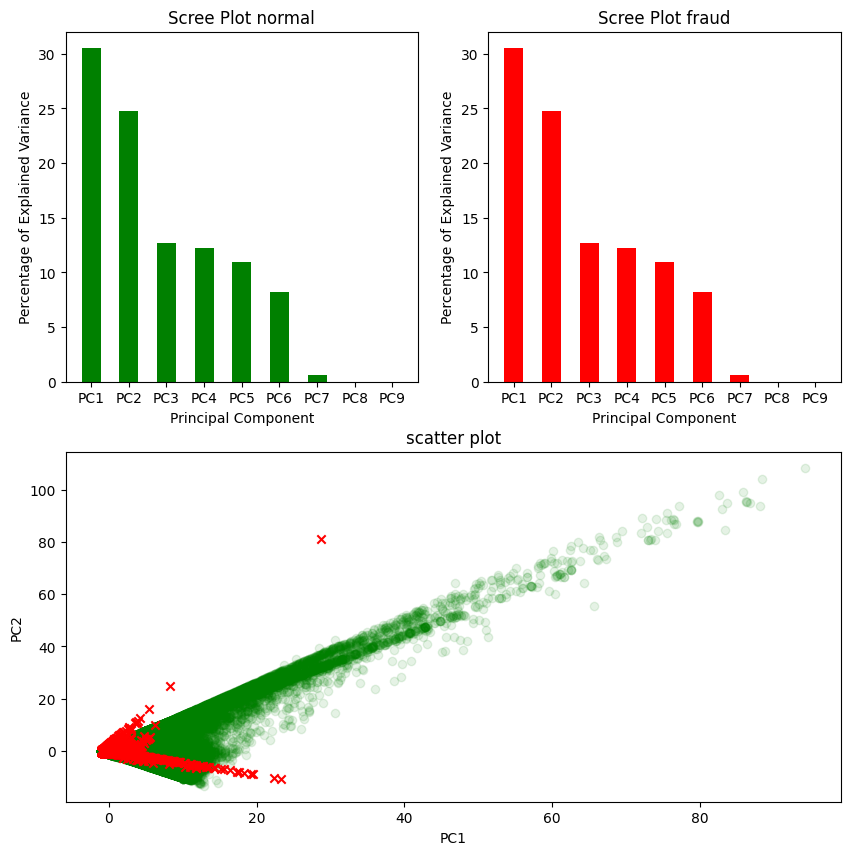

In [19]:
do_PCA(data_fraud, data_normal , 'fraud' , 'normal' , 'r' , 'g')

### First Two Eigen Vectors contain significant information about the data and can be seen above in the scree plot for fraud and normal transactions . After plotting the scatter plot for fraud and normal transactions it is very evident that fraud transactions do form a cluster overlapping the normal transactions in a particular region . We can truncate our search space if the value of PC1 and PC2 lies above 25 for both of the Principle Components . But this is not helping in detection of fraud transactions . We will try more methodologies .

# Logistic Regression

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle

In [21]:
data = pd.read_csv('preprocessed.csv')
data = data.drop(['Unnamed: 0'] , axis = 1)
data

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,0,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,181.00,181.00,0.00,0.00,0.00,1,0
3,2,181.00,181.00,0.00,21182.00,0.00,1,0
4,0,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
6362615,2,339682.13,339682.13,0.00,0.00,339682.13,1,0
6362616,1,6311409.28,6311409.28,0.00,0.00,0.00,1,0
6362617,2,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0
6362618,1,850002.52,850002.52,0.00,0.00,0.00,1,0


In [23]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [24]:
data_x = data.drop(['isFraud'] , axis = 1)
data_y = data['isFraud']

In [26]:
x_train , x_test , y_train , y_test = train_test_split(data_x , data_y , test_size=0.9)

In [27]:
print(x_train.shape , x_test.shape , y_train.shape  , y_test.shape)

(636262, 7) (5726358, 7) (636262,) (5726358,)


In [30]:
print(data.columns)

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


### Training and saving the model

In [37]:
model = LogisticRegression()
model.fit(x_train , y_train)
pickle.dump(model , open('LogisticRegression_' , 'wb'))

The accuracy of the model is 0.9973613245975889


### Testing the model on the test data

In [42]:
loaded_model = pickle.load(open('LogisticRegression_' , 'rb'))
print(f"The accuracy of the model is {loaded_model.score(x_test , y_test)*100}%")

The accuracy of the model is 99.73613245975889%


In [56]:
print("Formula of the Linear Equation in Logistic Regresison is : \n\n")

for i in range(7):
    print(f"{data.columns[i]}*{model.coef_[0][i]}+")

print("+", model.intercept_[0])

Formula of the Linear Equation in Logistic Regresison is : 


type*-8.587253092652528e-08+
amount*-0.0011413825197750757+
oldbalanceOrg*0.0011468520967317186+
newbalanceOrig*-0.0012256337675937883+
oldbalanceDest*2.721684622818057e-06+
newbalanceDest*-4.284718948903692e-06+
isFraud*1.0135496756239504e-11+
+ -5.029404821212187e-07


### The accuracy of the model is pretty high(99.7%) and satisfactory ! The formula for the sigmoid function indicated minimal weightage to parameters 'type' , 'oldbalanceDest' and 'newbalanceDest' . Also flagging the transaction as fraud has the least effect of it being a Fraud transaciton or not . Maybe we can remove it and train our model again to reduce the computational complexity . The rest have almost equal weightage and contribute more in the detection of the Fraud Transaction . The bias as well is minimal as compared to the big values over here . If Logistic Regression works this better , the trying out ANN would be a good option which would be a bit of overkill but can help in improvising accuracy to further decimal digits . Let's try it out .

# Aritificial Neural Networks(ANN)

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [53]:
data = pd.read_csv('preprocessed.csv')
data = data.drop(['Unnamed: 0'] , axis = 1)
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

### Scaling the data as scaled data gives increased performace in ANN or Neural Networks in general .

In [48]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.to_numpy())
data_scaled = pd.DataFrame(data_scaled , columns = data.columns)
data_scaled.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0.00,0.000106,0.002855,0.003233,0.000000,0.0,0.0,0.0
1,0.00,0.000020,0.000357,0.000391,0.000000,0.0,0.0,0.0
2,0.25,0.000002,0.000003,0.000000,0.000000,0.0,1.0,0.0
3,0.50,0.000002,0.000003,0.000000,0.000059,0.0,1.0,0.0
4,0.00,0.000126,0.000697,0.000603,0.000000,0.0,0.0,0.0


In [49]:
data_scaled.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,4.215772e-01,1.945599e-03,1.399484e-02,1.724540e-02,3.091721e-03,3.439269e-03,1.290820e-03,2.514687e-06
std,3.728388e-01,6.532045e-03,4.847261e-02,5.897038e-02,9.547833e-03,1.031539e-02,3.590480e-02,1.585775e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.448374e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e-01,8.099034e-04,2.384491e-04,0.000000e+00,3.727521e-04,6.026781e-04,0.000000e+00,0.000000e+00
75%,5.000000e-01,2.257778e-03,1.801042e-03,2.909313e-03,2.648861e-03,3.121768e-03,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [59]:
data_x = data_scaled.drop(['isFraud'] , axis = 1)
data_y = data_scaled['isFraud']
x_train , x_test , y_train , y_test = train_test_split(data_x , data_y , test_size=0.9)
print(x_train.shape , x_test.shape , y_train.shape  , y_test.shape)

(636262, 7) (5726358, 7) (636262,) (5726358,)


### Very basic ANN with two layers 

In [61]:
model = keras.Sequential([
    keras.layers.Dense(8, activation='relu', input_shape=(7,)),
    keras.layers.Dense(16 , activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mean_squared_error' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 64        
                                                                 
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the model

In [64]:
model.fit(x_train , y_train , epochs = 5 , validation_split= 0.05)

Epoch 1/5



18889/18889 [==============================] - 28s 1ms/step - loss: 0.0025 - accuracy: 0.9985 - val_loss: 0.0015 - val_accuracy: 0.9985
Epoch 2/5
18889/18889 [==============================] - 31s 2ms/step - loss: 0.0010 - accuracy: 0.9989 - val_loss: 9.3238e-04 - val_accuracy: 0.9990
Epoch 3/5
18889/18889 [==============================] - 28s 1ms/step - loss: 7.4858e-04 - accuracy: 0.9992 - val_loss: 8.2287e-04 - val_accuracy: 0.9991
Epoch 4/5
18889/18889 [==============================] - 23s 1ms/step - loss: 6.9992e-04 - accuracy: 0.9992 - val_loss: 8.0786e-04 - val_accuracy: 0.9991
Epoch 5/5
18889/18889 [==============================] - 23s 1ms/step - loss: 6.8336e-04 - accuracy: 0.9993 - val_loss: 8.0314e-04 - val_accuracy: 0.9991


In [65]:
model.save('ANN')

INFO:tensorflow:Assets written to: ANN\assets


INFO:tensorflow:Assets written to: ANN\assets


In [104]:
model = tf.keras.models.load_model("ANN")

### Yes Indeed this model gives us accuracy 99.9%+ but having such a heavy model as compared to logistic regression is not effective . But as this deals with cash and Frauds , accuracy stays the top most priority along with the precaution of not overfitting the model .

In [105]:
model.evaluate(x_test , y_test)

178949/178949 [==============================] - 251s 1ms/step - loss: 6.7746e-04 - accuracy: 0.9993


[0.0006774558569304645, 0.999252200126648]

#### Predicting a new data point

In [106]:
new_data_point = np.array([0, 2000, 500, 1000, 0, 0, 0 , 0.5])
scaled_new_data_point = scaler.transform(new_data_point.reshape(1, -1))
new_data_point = new_data_point[:7].reshape(1,-1)

In [107]:
model.predict(new_data_point)

1/1 [==============================] - 0s 105ms/step


array([[0.]], dtype=float32)